In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import pandas as pd

from sklearn.decomposition import PCA



In [32]:
df = pd.read_csv('processed_data/all_data.csv')
df = df.drop(['CPF'],axis=1)
df.head()

,Potencial Bruto,Raciocínio,Social,Motivacional,Cultura pontuação,atributo-Capacidade analítica,atributo-Pensamento conceitual,atributo-Reflexão,atributo-Pensamento criativo,atributo-Planejamento e organização,...,perfil-Facilitação,perfil-Flexibilidade,perfil-Estabilidade emocional,perfil-Ambição,perfil-Iniciativa,perfil-Assertividade,perfil-Tomada de riscos,Área,AveragePerformance,ModePerformance
0,53.65,65.70,37.65,56.75,32.33,59.67,49.44,63.08,56.26,52.85,...,41.95,55.59,78.32,60.14,41.95,8.74,55.59,Operações,2.50,2.0
1,NaN,60.78,NaN,NaN,35.13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Logística,2.00,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financeiro,2.00,2.0
3,22.46,15.71,5.67,56.75,23.36,11.43,18.25,13.14,16.54,36.95,...,32.86,46.50,46.50,32.86,51.05,32.86,41.95,Operações,2.75,3.0
4,NaN,56.15,NaN,NaN,62.03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pessoas,1.75,1.0


In [39]:
df_simple = df[['Potencial Bruto','Raciocínio','Social','Motivacional','Cultura pontuação','Área','AveragePerformance','ModePerformance']]
df_simple['IntAvgPerformance'] = df[['AveragePerformance']].apply(np.ceil) #round up values

/home/renata/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Área', ylabel='Potencial Bruto'>

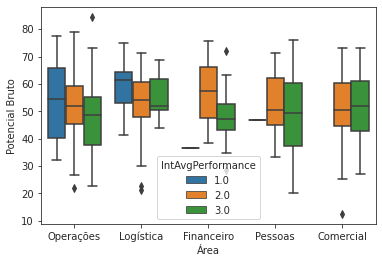

In [41]:
sns.boxplot(data=df_simple,x='Área',y='Potencial Bruto',hue='IntAvgPerformance')

<AxesSubplot:xlabel='Área', ylabel='Social'>

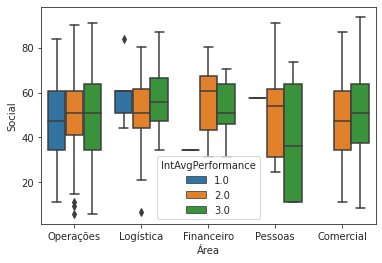

In [42]:
sns.boxplot(data=df_simple,x='Área',y='Social',hue='IntAvgPerformance')

<AxesSubplot:xlabel='Área', ylabel='Raciocínio'>

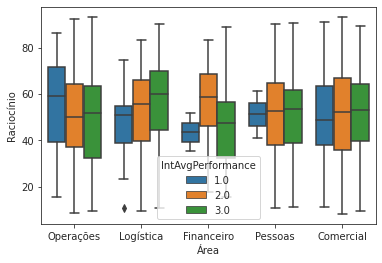

In [43]:
sns.boxplot(data=df_simple,x='Área',y='Raciocínio',hue='IntAvgPerformance')

<AxesSubplot:xlabel='Área', ylabel='Cultura pontuação'>

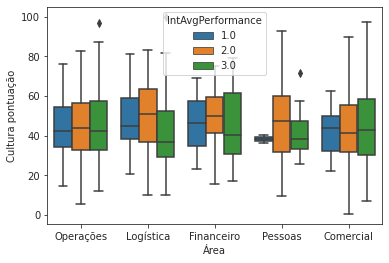

In [44]:
sns.boxplot(data=df_simple,x='Área',y='Cultura pontuação',hue='IntAvgPerformance')

In [81]:
X = df[['Raciocínio','Social','Motivacional','Cultura pontuação']]
y_area = df[['Área']]
y_per = df[['AveragePerformance']]

In [83]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

pipeline_preprocess = imbpipeline(steps=[
    ('imputer', KNNImputer(missing_values=np.nan,n_neighbors = 3,add_indicator=False)), #transform: solve missing values 
    ('scaler', StandardScaler()),                                     #transform: standart normalization of values (mean = 0, std = 1)
    #('model',PCA(n_components=2,random_state=0))  #classifier: constructs a lot of decision trees and uses the class selected by most trees
                        ])
pca = PCA(n_components=2,random_state=0)

In [84]:
X = pipeline_preprocess.fit_transform(X,y_area)
projected = pca.fit_transform(X)
print('Components:',pca.components_)
print('Explained variance:',pca.explained_variance_)


Components: [[-0.58559461 -0.52595322 -0.27622425 -0.55150008]
 [ 0.36495111 -0.11026654 -0.90822979  0.17254166]]
Explained variance: [1.51732294 0.98406401]


In [105]:
projected_df = pd.DataFrame({'Proj0':projected[:, 0],'Proj1':projected[:, 1]})
projected_df['Área'] = df[['Área']]
projected_df['AveragePerformance'] = df[['AveragePerformance']]

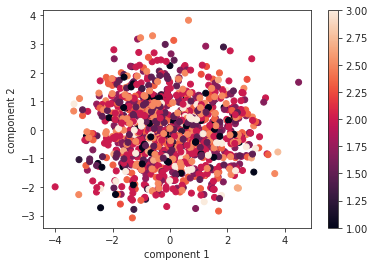

In [101]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_per.to_numpy(), 
            #cmap=plt.cm.get_cmap('spectral', 10)
            #cmap = plt.cm.get_cmap('tab10',5)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

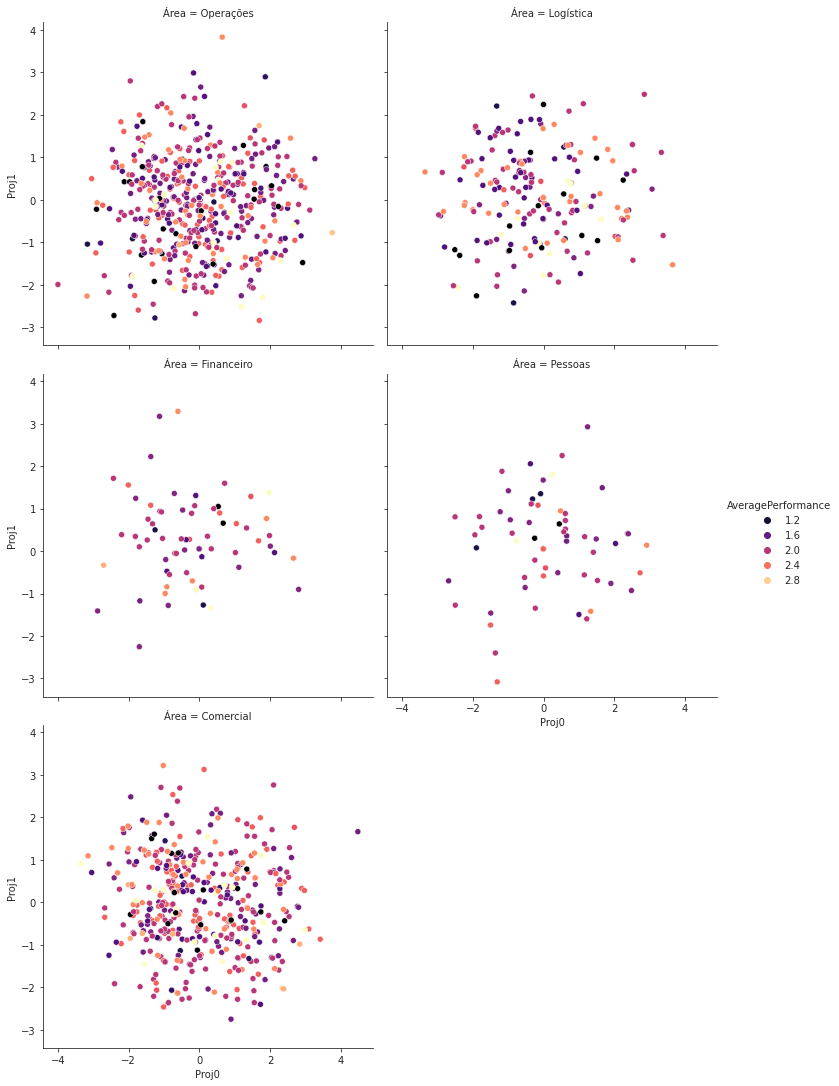

In [121]:
sns.relplot(
    data=projected_df, x="Proj0", y="Proj1",
    col="Área", hue="AveragePerformance", 
    kind="scatter",palette = 'magma',
    col_wrap = 2
)

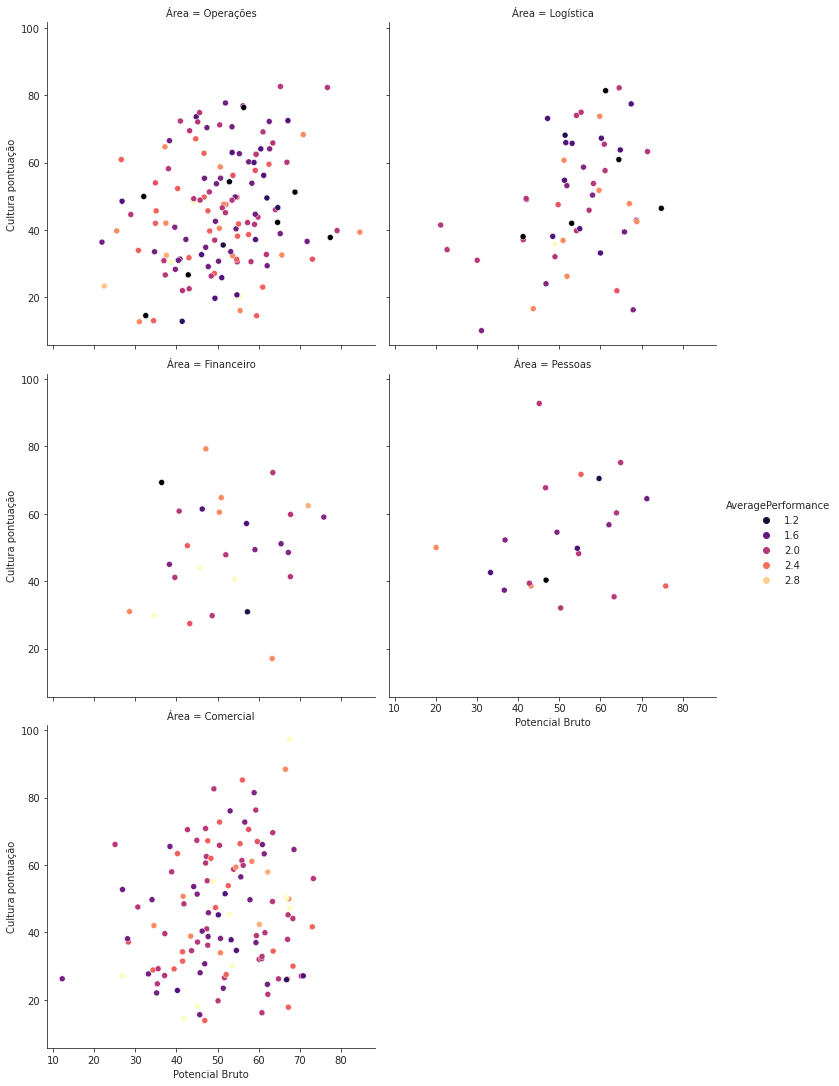

In [125]:
sns.relplot(
    data=df_simple, x='Potencial Bruto',y='Cultura pontuação',hue='AveragePerformance',
    col="Área", 
    kind="scatter",palette = 'magma',
    col_wrap = 2
)